# Big Data Project: House Prices - Advanced Regression Techniques
Presentazione del progetto di esame dell'a.a. 2021-2022 di Big Data del CLM in Ingegneria Informatica.

 Il lavoro presentato comprende lo svolgimento della competizione Kaggle __[House Prices - Avanced Regression Techniques]([http://url](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques))__, in cui viene richiesta un'analisi predittiva sul valore di mercato di abitazioni, sulla base di variabili descrittive di una moltitudine di caratteristiche degli immobili che, in diversa misura, ne influiscono sul prezzo.

![banner](./imgs/housesbanner.png)

Il __[dataset a disposizione](http://jse.amstat.org/v19n3/decock.pdf)__ (De Cock, 2011) comprende dei file `csv` contenenti informazioni sulle abitazioni della cittadina di __[Ames](https://www.google.com/maps/place/Ames,+IA,+USA/@42.0258192,-93.6964163,12z/data=!3m1!4b1!4m5!3m4!1s0x87ee70624634a06b:0x273156083cc75200!8m2!3d42.0307812!4d-93.6319131)__, nello stato americano dell'Iowa. In compendio al dataset, viene anche fornita una dettagliata __[descrizione](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)__ dei singoli campi:

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In particolare, Kaggle mette a disposizione la descrizione del dataset `data_description.txt` e i file `train.csv` e `test.csv`, necessari rispettivamente per l'addestramento del modello predittivo e la valutazione finale (su cui verrà calcolato lo score della competizione), che presentano la stessa struttura eccetto naturalmente per la colonna **SalePrice**, assente in `test.csv`, associata alla variabile target su cui bisognerà effettuare la predizione. 

Quello presentato è un problema di regressione, in cui risulta cruciale anche lo stage di analisi e preparazione dei dati da fornire al modello di apprendimento, in quanto il numero di campi per ogni record/casa è considerevole (79) e la mancata imputazione di dati mancanti e/o errati, così come la scelta di feature non rilevanti ai fini della valutazione del costo, può significativamente impattare l'efficacia dei regressori utilizzati.


## 0. Ambiente di lavoro e tecnologie utilizzate
L'analisi e l'addestramento sono interamente realizzati in Python (v3.8.2) tramite le rispettive API per l'interfacciamento con le tecnologie di Big Data per storage e processing distribuiti. 

In particolare, il framework per l'implementazione dell'architettura Big Data è composto da:
- ``Hadoop Distributed File System`` (HDFS v3.3.0) per la gestione (distribuita) delle repository contenenti i file di input/output ed elaborazione intermedia. **Nota**: il cluster Hadoop, in questo caso, è costituito da un solo nodo, in quanto la dimensione del dataset di lavoro è di poche centinaia di kB (460.68 kB per `train.csv` e 451.41 kB per `test.csv`), che rientra in un solo blocco HDFS, la cui dimensione standard è di 128 MB.
- ``Apache Spark`` (v3.3.0) come engine di data processing distribuito e la relativa API Python `pyspark`, che contiene sia le funzionalità di analisi dei dati secondo la filosofia dei DataFrame (ed RDD) (come nel caso di `pyspark.sql`), sia gli __[algoritmi di machine learning più diffusi](https://spark.apache.org/docs/latest/ml-guide.html)__ (localizzati in `pyspark.ml`).

Analisi ed elaborazioni sul dataset sono in gran parte svolte tramite le funzionalità messe a disposizione da `pyspark`, che gestisce in maniera autonoma l'esecuzione distribuita su cluster e il monitoraggio delle risorse e degli stati di completamento dei job lanciati. In alcuni casi verranno anche sfruttate le funzionalità aggiuntive dei DataFrame `pandas`, che, seppur di natura simile a quella dei DF Spark, presentano una maggior compatibilità con alcuni strumenti di analisi secondari come quelli di visualizzazione (`matplotlib` e `seaborn`). Ciononostante, l'utilizzo di DF `pandas` viene mantenuto fortemente limitato, in quanto il metodo `toPandas()`, che effettua la conversione di DataFrame a partire da Spark, __[sposta lo storage e l'elaborazione in locale](https://stackoverflow.com/questions/29226210/what-is-the-spark-dataframe-method-topandas-actually-doing)__, annullando di fatto la distribuzione e parallelizzazione delle computazioni. In uno scenario reale di Big Data naturalmente ciò è fortemente indesiderato in quanto una singola macchina potrebbe non disporre delle risorse necessarie per gestire internamente un quantitativo di dati che era precedentemente sparso su diversi nodi del cluster. Pertanto, ai fini di rimanere il più fedeli possibile ad una reale, pratica analisi Big Data, `toPandas()` verrà applicato in poche occasioni e solo su sottoinsiemi ristretti (e.g., selezioni, proiezioni, aggregazioni, ecc...) del dataset completo.

Il progetto verrà descritto in dettaglio nel presente notebook Jupyter, utilizzando il markdown per argomentare le scelte effettuate e commentare i risultati ottenuti, e lasciando ai commenti entro le celle di codice Python il chiarimento degli aspetti implementativi.

## 1. Setup dell'ambiente

### 1.1 HDFS
Una volta installato e configurato Hadoop in Windows, i suoi componenti vengono avviati eseguendo il file di scripting DOS `start-dfs.cmd`, che istanzia il FS, il gestore di risorse, il namenode e il singolo datanode, tutto in localhost (LAPTOP-MQUB85DE):

![datanode](./imgs/datanode_gui.png)

Per recuperare tutto il materiale fornito da Kaggle è possibile utilizzare l'apposita __[API](https://github.com/Kaggle/kaggle-api)__ con il comando
```bash
 > kaggle competitions download -c house-prices-advanced-regression-techniques
```
la popolazione del FS Hadoop avviene quindi con `hdfs dfs -put /local/path/to/data /hdfs/path/`, ottenendo una struttura del tipo 

![datapaths](./imgs/datapaths.png)

### 1.2 Spark
Il setup di Spark avviene invece con l'usuale prologo per reperire il percorso dell'eseguibile e istanziare la `SparkSession`:

In [1]:
import findspark 

location = findspark.find()
findspark.init(location)

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('HousePrices - S. Zammuto').getOrCreate()

# visualizzo le informazioni sulla sessione creata
spark.sparkContext

<SparkContext master=local[*] appName=HousePrices - S. Zammuto>

Per completare l'inizializzazione di tutti gli strumenti di lavoro e al fine di centralizzare l'elenco delle API chiamate, eseguo l'`import` di tutte le librerie di cui avrò bisogno nel resto del progetto.

In [2]:
# funzioni di utilità che operano su intere colonne dei DF Spark
from pyspark.sql.functions import col, when, count, isnan, isnull, expr, create_map, lit
from pyspark.sql.functions import log, exp, skewness

# tutto il necessario per la creazione ed esecuzione della pipeline di addestramento, assieme alla valutazione del risultato
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import IndexToString
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# pacchetti di visualizzazione
import matplotlib.pyplot as plt
import seaborn as sns

# altro
import numpy as np
from math import floor
from itertools import chain
from pyspark.ml.stat import Correlation

## 2. Data analysis
Questa sezione è dedicata all'analisi del dataset fornito, mirata al data cleaning e alla feature engineering, sulla base di cui sarà successivamente possibile effettuare la selezione finale delle variabili da fornire allo stage di apprendimento.

### 2.1 Analisi eplorativa
Come primo step, sfrutto la `SparkSession` istanziata per leggere il dataset direttamente da HDFS e associare ad esso i rispettivi DataFrame Spark.

In [3]:
# entrambi i csv presentano una riga di header con lo schema completo dei record successivi, 
# per cui la struttura può essere ricavata automaticamente settando il parametro inferSchema=True

# datasets = {'trainDF': spark.read.csv('hdfs://localhost:9000/bigdata/houseprices/datasets/train.csv', header=True, inferSchema=True),
#             'testDF': spark.read.csv('hdfs://localhost:9000/bigdata/houseprices/datasets/test.csv', header=True, inferSchema=True)}

datasets = {'trainDF': spark.read.csv('./datasets/train.csv', header=True, inferSchema=True),
            'testDF': spark.read.csv('./datasets/test.csv', header=True, inferSchema=True)}

In [4]:
# visualizzo alcuni metadati sul DF del trainset per controllare che la lettura sia avvenuta correttamente
datasets['trainDF'].printSchema()
print(f"Numero di righe del training set: {datasets['trainDF'].count()}")

# questo è uno dei pochi casi in cui viene utilizzato il metodo toPandas(), giustificato dalle seguenti motivazioni:
#   - prima della conversione estraggo solo le prime 10 righe del DF con limit(10) in maniera tale da riportare in locale solo
#     una piccola frazione dell'intero dataset;
#   - la visualizzazione del DF pandas comprende una scrollbar orizzontale che risulta più 'pulita' rispetto al df.show() di pyspark, 
#     che, nel caso di un numero esteso di colonne effettua il wrapping dell'output;
datasets['trainDF'].limit(10).toPandas().style.hide(axis='index')

root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: string (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |--

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75,10084,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal,307000
8,60,RL,NA,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
10,190,RL,50,7420,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NA,NA,NA,0,1,2008,W

In [5]:
# ripeto la stessa operazione per il testset
datasets['testDF'].printSchema()
print(f"Numero di righe del test set: {datasets['testDF'].count()}")
datasets['testDF'].limit(10).toPandas().style.hide(axis='index')

root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: string (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |--

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,NA,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,NA,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20,TA,TA,PConc,TA,TA,No,GLQ,602,Unf,0,324,926,GasA,Ex,Y,SBrkr,926,678,0,1604,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998,Fin,2,470,TA,TA,Y,360,36,0,0,0,0,NA,NA,NA,0,6,2010,WD,Normal
1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0,Gd,TA,PConc,Gd,TA,No,ALQ,263,Unf,0,1017,1280,GasA,Ex,Y,SBrkr,1280,0,0,1280,0,0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,1992,RFn,2,506,TA,TA,Y,0,82,0,0,144,0,NA,NA,NA,0,1,2010,WD,Normal
1466,60,RL,75,10000,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,763,763,GasA,Gd,Y,SBrkr,763,892,0,1655,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993,Fin,2,440,TA,TA,Y,157,84,0,0,0,0,NA,NA,NA,0,4,2010,WD,Normal
1467,20,RL,NA,7980,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0,TA,Gd,PConc,Gd,TA,No,ALQ,935,Unf,0,233,1168,GasA,Ex,Y,SBrkr,1187,0,0,1187,1,0,2,0,3,1,TA,6,Typ,0,NA,Attchd,1992,Fin,2,420,TA,TA,Y,483,21,0,0,0,0,NA,GdPrv,Shed,500,3,2010,WD,Normal
1468,60,RL,63,8402,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,789,789,GasA,Gd,Y,SBrkr,789,676,0,1465,0,0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998,Fin,2,393,TA,TA,Y,0,75,0,0,0,0,NA,NA,NA,0,5,2010,WD,Normal
1469,20,RL,85,10176,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0,TA,TA,PConc,Gd,TA,Gd,GLQ,637,Unf,0,663,1300,GasA,Gd,Y,SBrkr,1341,0,0,1341,1,0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990,Unf,2,506,TA,TA,Y,192,0,0,0,0,0,NA,NA,NA,0,2,2010,WD,Normal
1470,20,RL,70,8400,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,CBlock,TA,TA,No,ALQ,804,Rec,78,0,882,GasA,TA,Y,SBrkr,882,0,0,882,1,0,1,0,2,1,TA,4,Typ,0,NA,Attchd,1970,Fin,2,525,TA,TA,Y,240,0,0,0,0,0,NA,MnPrv,NA,0,4,2010,WD,Normal


#### 2.1.1 Variabili numeriche e categoriche
Come è possibile vedere dall'output di `printSchema()`, tutti i vari campi sono `nullable`, con tipo di dato inferito `string` o `integer`. Ciò significa che il dataset può contenere valori nulli e che sono presenti sia variabili categoriche che numeriche, le quali dovranno essere gestite separatamente.

Una prima stima sulla separazione tra le due tipologie di variabili può essere svolta controllando il `dtype` inferito da Spark per `trainDF`:

In [6]:
init_cat_vars_est = [item[0] for item in datasets['trainDF'].dtypes if item[1].startswith('string')]
print(f"Stima iniziale del numero di variabili categoriche: {len(init_cat_vars_est)}\n {init_cat_vars_est}")

Stima iniziale del numero di variabili categoriche: 46
 ['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [7]:
# il set delle variabili numeriche è il complementare di quelle categoriche, eccetto per il campo 'Id' che, seppur numerico, non
# fornisce informazioni aggiuntive sui record
init_num_vars_est = [var for var in datasets['trainDF'].columns if var not in init_cat_vars_est and var != 'Id']
print(f"Stima iniziale del numero di variabili numeriche: {len(init_num_vars_est)}\n {init_num_vars_est}")

Stima iniziale del numero di variabili numeriche: 34
 ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Per quanto la deduzione automatica dei tipi dia una prospettiva generale sulla distribuzione delle tipologie di dato, la cross-reference con le informazioni fornite dalla piattaforma Kaggle* suggerisce la presenza di alcune inesattezze nella stima effettuata. Ne sono un esempio i campi **LotFrontage**, **MasVnrArea** e **GarageYrBlt** di `trainDF` che, seppur inseriti in `init_cat_vars_est`, sono in realtà variabili numeriche, e sono state parsate come stringhe in quanto le istanze di dati (numerici) mancanti, in questo dataset, sono codificate con `NA`, che, non essendo una keyword Python (come invece è `None`), viene interpretata come stringa.

Lo stesso discorso, in `testDF`, isola le feature **BsmtFinSF1**, **BsmtFinSF2**, **BsmtUnfSF**, **TotalBsmtSF**, **BsmtFullBath**, **BsmtHalfBath**, **GarageCars**, **GarageArea**.

Sulla base di queste considerazioni è possibile riportare le colonne in questione al tipo corretto.

*Ad esempio, è immediato riconoscere una feature numerica se il suo nome presenta il suffisso **\[...\]Area** o **\[...\]SF** (Square Feet).<br/>

In [8]:
cat_to_num_vars_train = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cat_to_num_vars_test = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                            'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']

cat_to_num_vars = cat_to_num_vars_train + cat_to_num_vars_test

# effettuo la conversione categorico -> numerico in ogni DF e per ogni variabile di cat_to_num_vars
for name in datasets.keys():
    for var in cat_to_num_vars:

        # sostituisco nelle colonne interessate le istanze di 'NA' con None
        datasets[name] = datasets[name].withColumn(var, \
                                            when(datasets[name][var] == 'NA', None).\
                                            otherwise(datasets[name][var]))

        # una volta che le stringhe sono state rimosse, eseguo il cast della colonna ad un tipo numerico 
        # (dato che non so se effettivamente tutti i valori non nulli sono interi, scelgo il cast a double 
        # per essere sicuro di evitare troncamenti e mantenere la massima precisione)
        datasets[name] = datasets[name].withColumn(var, col(var).cast('double'))

Di contro, è possibile notare anche che variabili numeriche che codificano una suddivisione in classi sono in realtà categoriche, come nel caso di MSSubClass, la cui descrizione in `data_description.txt` è:
```
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
```

In [9]:
# eseguo direttamente il cast a string e non tengo conto dei 'NA' in quanto:
#   - dalla documentazione Kaggle, non sono presenti valori nulli (eplicitamente codificati) nella colonna MSSubClass;
#   - l'eventuale presenza di valori None verrà gestita dalle successive procedure di imputazione dei valori nulli.
for name in datasets.keys():
    datasets[name] = datasets[name].withColumn('MSSubClass', col('MSSubClass').cast('string'))

Adesso sono sicuro che sia `trainDF` che `testDF` hanno lo stesso schema e le stesse tipologie di variabili, sempre a meno del target **SalePrice**.

In [10]:
# sistemo la lista della stima iniziale attraverso il DF trasformato
cat_vars_est = [item[0] for item in datasets['trainDF'].dtypes if item[1].startswith('string')]
num_vars_est = [var for var in datasets['trainDF'].columns if var not in cat_vars_est and var != 'Id']

print(f"Nuova stima del numero delle variabili categoriche di trainDF: {len(cat_vars_est)}\n {cat_vars_est}")
print(f"\nNuova stima del numero di variabili numeriche di trainDF: {len(num_vars_est)}\n {num_vars_est}")

Nuova stima del numero delle variabili categoriche di trainDF: 44
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Nuova stima del numero di variabili numeriche di trainDF: 36
 ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbv

In [11]:
# controllo la corrispondenza con i tipi del testset
cat_vars_est_t = [item[0] for item in datasets['testDF'].dtypes if item[1].startswith('string')]
num_vars_est_t = [var for var in datasets['testDF'].columns if var not in cat_vars_est and var != 'Id']

print(f"Nuova stima del numero delle variabili categoriche di testDF: {len(cat_vars_est_t)}\n {cat_vars_est_t}")
print(f"\nNuova stima del numero di variabili numeriche di testDF: {len(num_vars_est_t)}\n {num_vars_est_t}")

Nuova stima del numero delle variabili categoriche di testDF: 44
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Nuova stima del numero di variabili numeriche di testDF: 35
 ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr

Bisognerà anche tenere conto che, nelle variabili effettivamente categoriche, `NA` non sempre equivale a `None`, dato che per alcune di esse è da interpretare come 'assenza (nell'abitazione) della caratteristica da categorizzare' e non come 'dato mancante', come anche viene esplicitato in `data_description.txt`, in cui ad esempio `NA` in **Fence** ha significato di 'staccionata non presente':

```
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
```

#### 2.1.2 Analisi del target **SalePrice**
**SalePrice** è la variabile target del nostro task di predizione, quella a cui farà riferimento il modello regressore nelle fasi di addestramento sul trainset e predizione sul testset. In qualità di variabile (numerica) singola, è possibile studiarne il comportamento plottandone la distribuzione sui valori di `trainDF`.

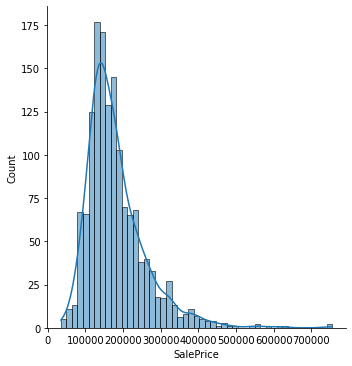

In [12]:
# estraggo i valori della colonna SalePrice e li memeorizzo in una lista, che poi verrà passata al tool di visualizzazione
sale_prices = [row['SalePrice'] 
        for row in datasets['trainDF'].select('SalePrice').collect()]

# plotto i dati recuperati sulla displot di seaborn, settando 
# il parametro kde=True per visualizzare anche l'andamento della distribuzione
sns.displot(sale_prices, kde=True)
plt.xlabel("SalePrice");

La stima della distribuzione di **SalePrice** è stata calcolata tramite una __[Kernel Density Estimation (KDE)](https://mathisonian.github.io/kde/)__, espressa come 

$$ \hat{f}(x) = \sum_{observations} K\left( \displaystyle\frac{x - observation}{bandwidth}\right)$$

in cui *bandwidth* è la deviazione standard dello smoothing kernel $K$, gaussiano nel caso della KDE di `seaborn`. Possiamo sfruttare la *bandwidth* default dell'algoritmo in quanto sappiamo che si comporta bene in casi in cui la distribuzione reale è __[smooth, unimodale e approssimativamente a forma di campana](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)__, come nel nostro caso.

Graficamente, si può notare che la distribuzione di **SalePrice** presenta una skewness non trascurabile, equivalente a:

In [13]:
print(f"Skewness di SalePrice: {datasets['trainDF'].select(skewness('SalePrice')).collect()[0][0]}")

Skewness di SalePrice: 1.8809407460340333


che si può ridurre effettuando una __[Log-transformation](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/)__ sulla distribuzione di partenza. Questa operazione risulta quasi necessaria nel nostro caso, in quanto buona parte dei modelli di regressione lavorano sull'ipotesi che la variabile dipendente sia distribuita in maniera normale, e __[la presenza di skewness nei dati potrebbe propagarsi nella distribuzione degli errori](https://stats.stackexchange.com/questions/299154/the-benefit-of-unskewing-skewed-data)__, alterando lo stage di **evaluation** del regressore.

In [14]:
datasets['trainDF'] = datasets['trainDF'].withColumn('SalePrice', log(col('SalePrice')))

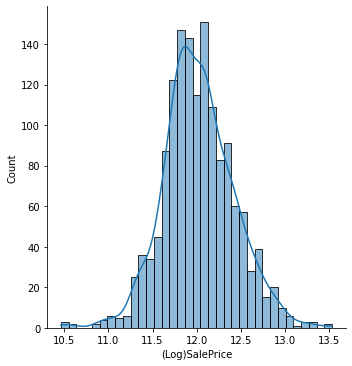

In [15]:
# come prima, estraggo la colonna (trasformata) e la visualizzo
unskewed_prices = [row['SalePrice'] 
        for row in datasets['trainDF'].select('SalePrice').collect()]

sns.displot(unskewed_prices, kde=True)
plt.xlabel("(Log)SalePrice");

Il risultato ottenuto è quello desiderato, in cui abbiamo mantenuto le dipendenze di **SalePrice** su una distribuzione più vicina ad una normale, in cui la skewness è significativamente ridotta:

In [16]:
print(f"Skewness di (Log)SalePrice: {datasets['trainDF'].select(skewness('SalePrice')).collect()[0][0]}")

Skewness di (Log)SalePrice: 0.12121036730136245


### 2.2 Correlazione delle feature numeriche
Ai fini della feature selection rispetto ai dati numerici, può tornare utile estrarre solo quelle variabili che influiscono maggiormente sui valori di **SalePrice**. In questi termini, un valore 'alto' di una metrica di correlazione statistica può essere manifestazione di una forte dipendenza delle feature numeriche con il target. In particolare, verrà sfruttata la __[correlazione di Spearman](https://www.jstor.org/stable/1412159?origin=crossref&seq=1)__ per la sua caratteristica di miglior rilevazione di correlazioni nonlineari rispetto alla tradizionale __[correlazione di Pearson](https://royalsocietypublishing.org/doi/10.1098/rspl.1895.0041)__.

Nello specifico, il coefficiente di correlazione di Spearman $r_s$ è definito sul coefficiente di Pearson $\rho_{R(X),R(Y)}$ tra i ranghi $R(X), R(Y)$ delle variabili di input $X,Y$:

$$ r_s = \rho_{R(X),R(Y)} = \frac{cov(R(X),R(Y))}{\sigma_{R(X)}\sigma_{R(Y)}} $$

Su questa espressione si basa il metodo `corr()` parametrizzato con metodologia `spearman` della classe `Correlation` del modulo `pyspark.ml.stat`, che useremo per generare e visualizzare la matrice di correlazione completa sulle variabili numeriche.

In [17]:
# il metodo corr() necessita di colonne di input di tipo Vector, che generiamo con pyspark.ml.feature.VectorAssempler
vector_col = 'corr_features'
assembler = VectorAssembler(inputCols=num_vars_est, outputCol='corr_features')
df_vector = assembler.transform(datasets['trainDF'].dropna(how="any", subset=num_vars_est)).select(vector_col)

# calcolo la matrice di correlazione
corr_matrix = Correlation.corr(df_vector, vector_col, method='spearman').collect()[0][0].toArray().tolist()

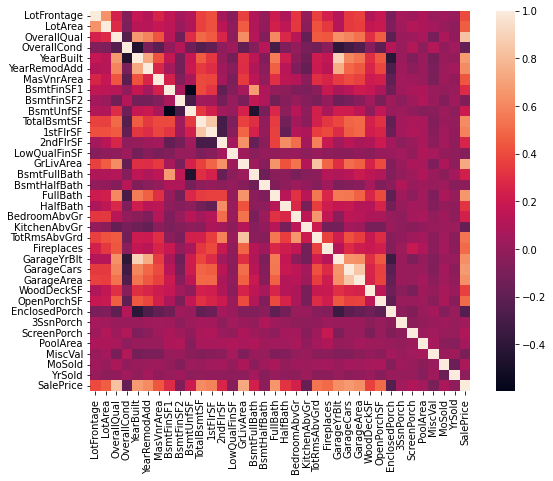

In [18]:
# visualizzo la heatmap sulle correlazioni calcolate: più chiaro il gradiente di colore, 
# maggiore il coefficiente di correlazione tra le variabili
plt.figure(figsize=(9,7))
sns.heatmap(corr_matrix, xticklabels=num_vars_est, yticklabels=num_vars_est, square=True);

Di tutta la matrice di correlazione, ci interessa solo l'ultima riga (o colonna), quella associata alle correlazioni su **SalePrice**. Di questi valori, verranno estratti quelli al di sopra di una certa soglia, relativi a variabili con una 'forte' dipendenza con **SalePrice**.

In [19]:
# setto la soglia
corr_threshold = 0.3

# considero l'ultima riga della matrice di correlazione, quella relativa a SalePrice 
saleprice_corr = corr_matrix[-1]

# estraggo le feature con maggior correlazione (> corr_threshold) con SalePrice
high_corr_num_vars = [num_vars_est[i] 
    for i in [idx for idx in range(len(saleprice_corr)) if saleprice_corr[idx] > corr_threshold] if num_vars_est[i] != 'SalePrice']

print(f"{len(high_corr_num_vars)} variabili numeriche maggiormente correlate con SalePrice:\n {high_corr_num_vars}")

18 variabili numeriche maggiormente correlate con SalePrice:
 ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


### 2.3 Analisi delle variabili a maggior correlazione
Tra tutte le variabili numeriche, vengono selezionate le 18 a maggior correlazione con **SalePrice** appena estratte. Data la loro importanza, risulta necessaria un'analisi più approfondita sulla loro distribuzione, presenza di outlier e valori nulli.

Come visto precedentemente, l'alta correlazione con **SalePrice** suggerisce una dipendenza tra le variabili, che è possibile dedurre anche dalla visualizzazione degli scatterplot tra le singole feature e il target.

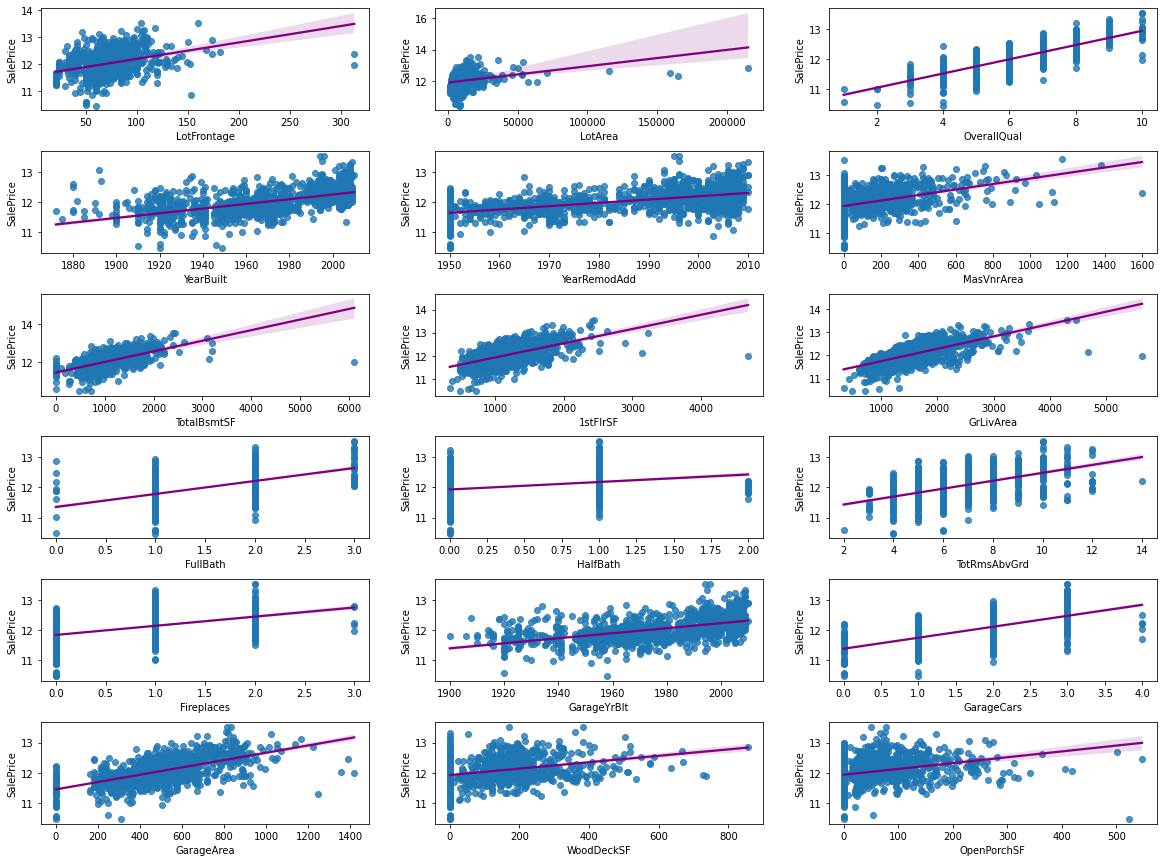

In [20]:
# sfrutto regplot perchè permette di visualizzare anche la regressione lineare dell'input sopra il classico scatterplot;
# la figura finale è composta sai subplot calcolati individualmente, su singole colonne, motivo per cui è stato nuovamente
# utilizzato toPandas(), oltre che per la sua compatibilità con seaborn

fig, axes = plt.subplots(6, 3, figsize = (20, 15))
fig.subplots_adjust(hspace=0.4)
for idx, high_corr_var in enumerate(high_corr_num_vars):
    sns.regplot(x=high_corr_var, y='SalePrice', 
                data=datasets['trainDF'].select(high_corr_var, 'SalePrice').toPandas(), 
                ax=axes[(idx//3), idx%3], line_kws={'color': 'purple'})

#### 2.3.1 Rimozione degli outlier
L'osservazione degli scatterplot, e in particolare delle regressioni valutate, conferma la relazione tra le singole variabili e **SalePrice**. Inoltre, è anche possibile individuare direttamente alcuni outlier che si discostano dal trend generale, in particolare nel caso di **LotFrontage**, **LotArea**, **MasVnrArea**, **TotalBsmtSF**, **1stFlrSF**, **GrLivArea**, **GarageArea** e **OpenPorchSF**. I record 'sporchi' verranno quindi eliminati tramite un filtraggio sulla base di soglie dedotte direttamente dai grafici. Oltre a quelli individuati esistono sicuramente altri valori che non seguono il trend, tuttavia, al fine di minimizzare il numero di record eliminati, e soprattutto per evitare che l'addestramento vada in overfitting, la gestione degli outlier è volutamente mantenuta in maniera 'lasca'.

In [21]:
# eliminazione dei record con outlier tramite la selezione con filter()
datasets['trainDF'] = datasets['trainDF'].filter((col('LotFrontage') < 200) &
                                                 (col('LotArea') < 20000) &
                                                 (col('MasVnrArea') < 1500) &
                                                 (col('TotalBsmtSF') < 4000) &
                                                 (col('1stFlrSF') < 3500) & 
                                                 (col('GrLivArea') < 4670) &
                                                 (col('GarageArea') < 1240))

Il nuovo plot ci mostra quindi la relazione 'ripulita' delle variabili numeriche con **SalePrice**.

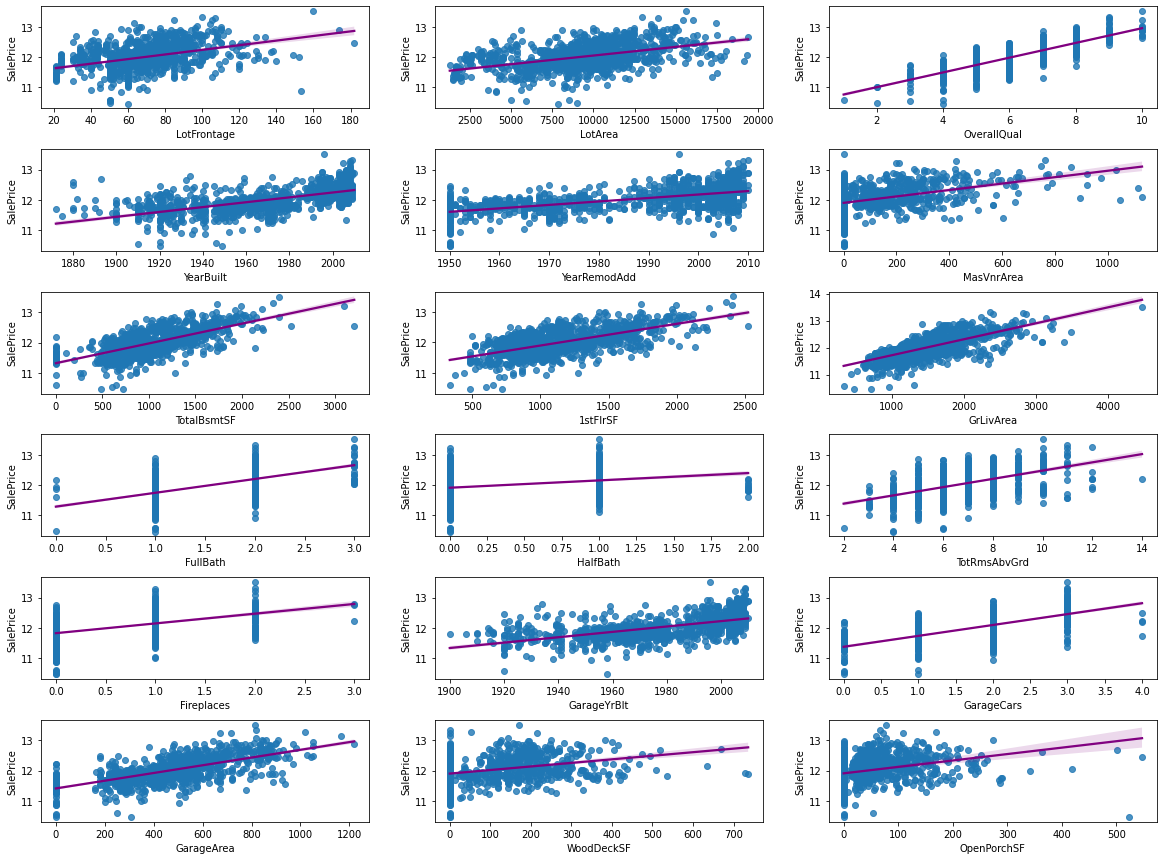

In [22]:
fig, axes = plt.subplots(6, 3, figsize = (20, 15))
fig.subplots_adjust(hspace=0.4)
for idx, high_corr_var in enumerate(high_corr_num_vars):
    sns.regplot(x=high_corr_var, y='SalePrice', 
                data=datasets['trainDF'].select(high_corr_var, 'SalePrice').toPandas(), 
                ax=axes[(idx//3), idx%3], line_kws={'color': 'purple'})

#### 2.3.2 Feature selection (numerica)
Gli studi e le elaborazioni svolte finora ci hanno permesso di individuare le variabili numeriche significative per il nostro problema, motivo per cui è possibile iniziare a snellire i dataset rimuovendo le colonne a bassa correlazione e lasciando solo quelle presenti in `high_corr_num_vars`.

In [23]:
# seleziono le colonne numeriche non appartenenti a high_corr_num_vars
low_corr_num_vars = [var for var in num_vars_est if var not in high_corr_num_vars and var != 'SalePrice']

print(f'Variabili a bassa correlazione:\n {low_corr_num_vars}')

Variabili a bassa correlazione:
 ['OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [24]:
# drop effettivo delle colonne in low_corr_num_vars
for name in datasets.keys():
    datasets[name] = datasets[name].drop(*low_corr_num_vars)

### 2.4 Gestione dei valori mancanti
Una volta codificati i valori nulli con `None` e ripuliti i restanti valori, è possibile sfruttare a pieno i metodi di `pyspark` per la rilevazione di dati mancanti. In particolare, nel caso in cui un campo abbia un alto quantitativo di nulli (relativamente al totale), la strategia sarà quella di effettuare il drop diretto della colonna. Se invece i dati assenti sono in numero ristretto, il drop dell'intera colonna potrebbe causare la perdita di informazioni di significato ai fini della predizione finale del prezzo dell'abitazione; segue che, in questo caso, sarà necessaria un'analisi più approfondita per riempire i nulli con valori dedotti sul resto del dataset.

In [25]:
# implemento il comportamento di pandas.DataFrame.isnull

# UDF per sostituire True e False nelle istanze di valori nulli, NA e None
def is_null(df):
    return df.select([(isnan(col(column)) | isnull(col(column))) for column in df.columns])

# creo un nuovo DF per ogni dataset tramite il metodo transform con la UDF definita;
# quindi riporto i nomi dei campi all'originale
nullDS = {name: datasets[name].transform(is_null).toDF(*datasets[name].columns) for name in datasets.keys()}

In [26]:
# conto i valori nulli di ogni colonna ed estraggo i campi in cui c'è almeno 1 valore nullo
def count_nulls(df):
    has_null = []
    for column in df.columns:
        null_count = df.where(col(column) | col(column).isNull()).count()
        if null_count > 0:
            has_null.append((column, null_count))
    return has_null

nullCountDS = {}
for name, df in nullDS.items():
    
    # istanzio i rispettivi DataFrame in cui memorizzare il conteggio dei nulli
    nullCountDS[name] = spark.createDataFrame(count_nulls(df), 'columnWithNulls STRING, nullCount INT')

    # aggiungo una colonna per visualizzare la percentuale dei nulli sul totale
    nullCountDS[name] = nullCountDS[name].withColumn("percentage", col('nullCount')/df.count())

    print(f'Valori nulli di {name}:')
    nullCountDS[name].show()

Valori nulli di trainDF:
+---------------+---------+------------------+
|columnWithNulls|nullCount|        percentage|
+---------------+---------+------------------+
|    GarageYrBlt|       74|0.0638481449525453|
+---------------+---------+------------------+

Valori nulli di testDF:
+---------------+---------+--------------------+
|columnWithNulls|nullCount|          percentage|
+---------------+---------+--------------------+
|    LotFrontage|      227| 0.15558601782042494|
|     MasVnrArea|       15| 0.01028101439342015|
|    TotalBsmtSF|        1|6.854009595613434E-4|
|    GarageYrBlt|       78|0.053461274845784786|
|     GarageCars|        1|6.854009595613434E-4|
|     GarageArea|        1|6.854009595613434E-4|
+---------------+---------+--------------------+



In [27]:
for name in datasets.keys():
    datasets[name] = datasets[name].fillna(0, ['GarageYrBlt'])

Dalle analisi svolte è possibile notare che **GarageYrBlt** è l'unica variabile con istanze nulle in `trainDF`, mentre `testDF` presenta valori mancanti su più variabili numeriche (tra cui anche **GarageYrBlt**). Come già discusso, poichè ci troviamo in presenza di un numero ristretto di nulli, si procederà, colonna per colonna, con l'imputazione sulla base di ulteriori analisi sul resto dei valori. 

**GarageYrBlt** presenta un numero non del tutto indifferente di valori NA, associati alle abitazioni che non hanno un garage e per cui quindi non è disponibile l'anno di costruzione di quest'ultimo. Dato che non è possibile imputare i valori in maniera numerica, questa sarà l'unica eccezione in cui un 'anno' verrà interpretato come categoria piuttosto che numero.

**LotFrontage** ha la seguente definizione in `data_description.txt`:
```
LotFrontage: Linear feet of street connected to property
```
che possiamo di conseguenza imputare calcolando una media sul resto dei valori della colonna. 

In [28]:
# sfrutto il metodo fillna() assieme alla funzione di aggregazione 'avg' per riempire i valori mancanti con la media
# calcolata sul resto della colonna 
datasets['testDF'] = datasets['testDF'].fillna(floor(datasets['testDF'].agg({'LotFrontage': 'avg'}).collect()[0][0]), ['LotFrontage'])

**MasVnrArea** è associata alla categorica **MasVnrType** nel seguente modo:
```
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet
```
inoltre, visualizzando la proiezione su **MasVnrType** e **MasVnrArea**:

In [29]:
datasets['testDF'].filter(col('MasVnrArea').isNull()).select('Id', 'MasVnrType', 'MasVnrArea').show()

+----+----------+----------+
|  Id|MasVnrType|MasVnrArea|
+----+----------+----------+
|1692|        NA|      null|
|1707|        NA|      null|
|1883|        NA|      null|
|1993|        NA|      null|
|2005|        NA|      null|
|2042|        NA|      null|
|2312|        NA|      null|
|2326|        NA|      null|
|2341|        NA|      null|
|2350|        NA|      null|
|2369|        NA|      null|
|2593|        NA|      null|
|2658|        NA|      null|
|2687|        NA|      null|
|2863|        NA|      null|
+----+----------+----------+



è possibile notare come tutti i casi in cui **MasVnrArea** è `null` corrispondo all'assenza, codificata con `NA`, della caratteristica **MasVnrType** dell'abitazione (col significato discusso nella sezione 2.1.1 per **Fence**). Segue che i valori nulli, in questo caso, potranno essere sostituiti da `0`, che, numericamente, codifica lo stesso significato di `NA` per la variabile categorica corrispondente.

In [30]:
datasets['testDF'] = datasets['testDF'].fillna(0, ['MasVnrArea'])

Come nel caso precedente, la visualizzazione dei valori nulli su **BsmtFinSF1** (o, equivalentemente, **TotalBsmtSF**): 

In [31]:
# datasets['testDF'].filter(col('BsmtFinSF1').isNull()).select('Id', 'BsmtFinType1','TotalBsmtSF', 'BsmtFinSF1').show()

ci dice che l'asssenza del dato sulla dimensione del seminterrato deriva dall'assenza del seminterrato nell'abitazione (`BsmtFinType1 == 'NA'`), imputabile numericamente con lo `0`.

In [32]:
# datasets['testDF'] = datasets['testDF'].fillna(0, ['BsmtFinSF1', 'TotalBsmtSF'])
datasets['testDF'] = datasets['testDF'].fillna(0, ['TotalBsmtSF'])

Nel caso di **GarageCars** e **GarageArea**, notiamo che entrambe le variabili sono `null` in corrispondenza dello stesso record:

In [33]:
datasets['testDF'].filter(col('GarageCars').isNull()).select('Id', 'GarageType', 'GarageArea','GarageCars').show()

+----+----------+----------+----------+
|  Id|GarageType|GarageArea|GarageCars|
+----+----------+----------+----------+
|2577|    Detchd|      null|      null|
+----+----------+----------+----------+



ma, a differenza dei casi precedenti, il garage è effettivamente presente, dato che **GarageType** è `Detchd` invece che `NA`:
```
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
```

di conseguenza, questi ultimi due valori mancanti verranno imputati nuovamente con la media valutata sui valori presenti negli altri record.

In [34]:
datasets['testDF'] = datasets['testDF'].fillna(floor(datasets['testDF'].agg({'GarageArea': 'avg'}).collect()[0][0]), ['GarageArea'])

In [35]:
# aggiungo il cast esplcito a int in quanto non ha senso avere un valore non intero quando si parla della capienza del garage 
# in termini del numero di macchine che può contenere
datasets['testDF'] = datasets['testDF'].fillna(int(floor(datasets['testDF'].agg({'GarageCars': 'avg'}).collect()[0][0])), ['GarageCars'])

### 2.5 Unskewing
Nella sezione 2.1.2 è stato trattato l'unskewing del target **SalePrice** per migliorare l'efficacia dei modelli di apprendimento automatico. Le restanti feature numeriche appena estratte e ripulite non sono da meno, e anche per esse verrà effettuata una Log-transformation.

Visualizziamo le distribuzioni delle singole variabili numeriche, ad esempio su `trainDF`:

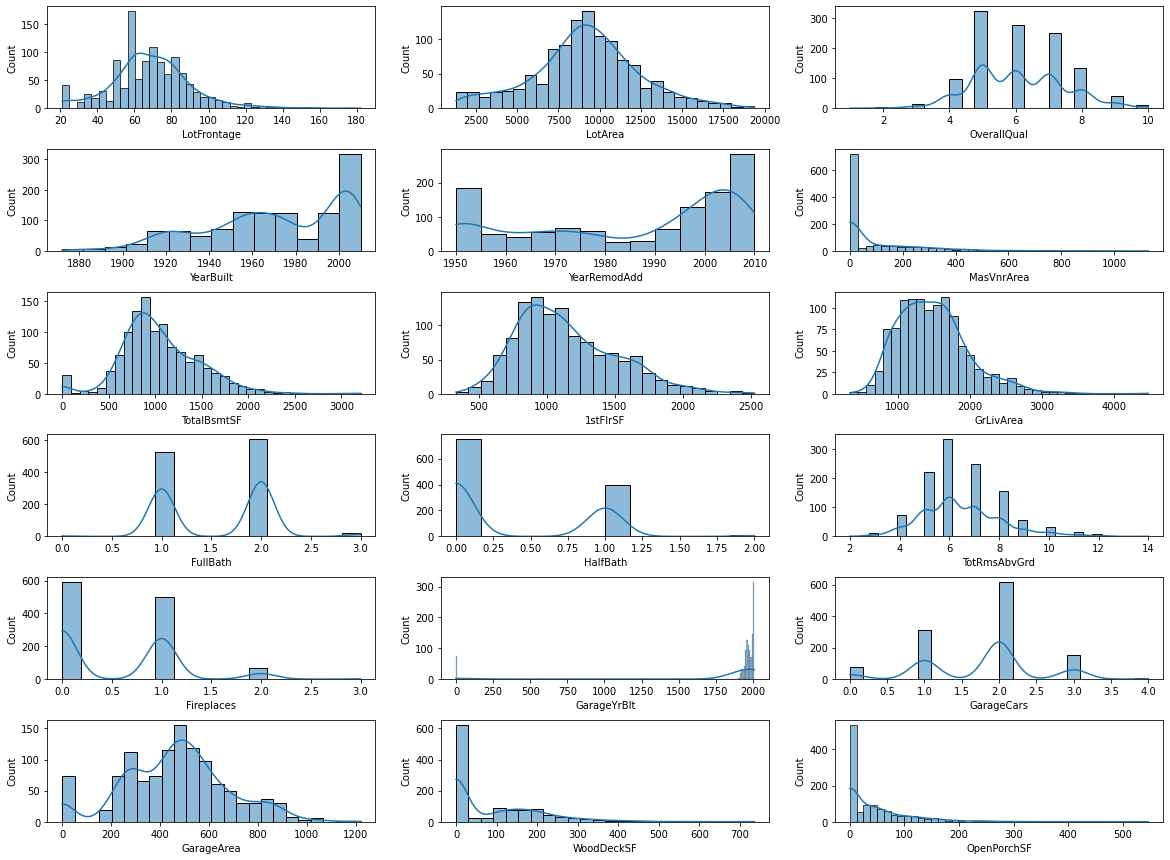

In [36]:
fig, axes = plt.subplots(6, 3, figsize = (20, 15))
fig.subplots_adjust(hspace=0.4)
for idx, high_corr_var in enumerate(high_corr_num_vars):
    vals = [row[high_corr_var] 
        for row in datasets['trainDF'].select(high_corr_var).collect()]
    sns.histplot(data=vals, ax=axes[idx//3, idx%3], kde=True)
    axes[idx//3, idx%3].set(xlabel=high_corr_var)

Sempre in maniera simile a **SalePrice**, si può quantificare la skewness tramite il metodo column-wise `skewness` del modulo `pyspark.sql.functions`:

In [37]:
# UDF per la skewness delle variabili numeriche a maggior correlazione
def eval_skew(df):
    skew = []
    for column in high_corr_num_vars:
        col_skew = df.select(skewness(column).alias(column)).collect()[0][0]
        skew.append((column, col_skew))
    return skew

# creo dei DF per la skewness
skewDS = {}
for name, df in datasets.items():
    skewDS[name] = spark.createDataFrame(eval_skew(df), ['column', 'skewness'])

In [38]:
skewDS['trainDF'].show()

+------------+--------------------+
|      column|            skewness|
+------------+--------------------+
| LotFrontage|  0.5389018521863974|
|     LotArea|0.018162894209256406|
| OverallQual|  0.2092943702206508|
|   YearBuilt|  -0.559786669285063|
|YearRemodAdd| -0.5165899366400509|
|  MasVnrArea|  2.3899019619563355|
| TotalBsmtSF| 0.46548573953108974|
|    1stFlrSF|  0.7144665067838104|
|   GrLivArea|  0.9215097156194803|
|    FullBath| 0.06916102017039837|
|    HalfBath|  0.7807115143455075|
|TotRmsAbvGrd|  0.6911156509572145|
|  Fireplaces|  0.7117172654385089|
| GarageYrBlt| -3.5518603214261635|
|  GarageCars| -0.2927547616233367|
|  GarageArea|-0.00769246832408...|
|  WoodDeckSF|  1.4563827802676623|
| OpenPorchSF|   2.527985595144266|
+------------+--------------------+



In [39]:
skewDS['testDF'].show()

+------------+--------------------+
|      column|            skewness|
+------------+--------------------+
| LotFrontage|  0.7325097168411175|
|     LotArea|    3.11201293972186|
| OverallQual| 0.18100967980519436|
|   YearBuilt| -0.5870522646411163|
|YearRemodAdd|-0.39949472741730246|
|  MasVnrArea|  2.5469466160213985|
| TotalBsmtSF|  0.8042383390151242|
|    1stFlrSF|  1.5565921331805246|
|   GrLivArea|    1.12923991364573|
|    FullBath|  0.2955344004426562|
|    HalfBath|   0.713992526233611|
|TotRmsAbvGrd|  0.8417309232677174|
|  Fireplaces|  0.8190151321542428|
| GarageYrBlt| -3.9479536778533775|
|  GarageCars|-0.10559017298700615|
|  GarageArea|  0.3000400149749438|
|  WoodDeckSF|  2.1285686872921277|
| OpenPorchSF|   2.685014751482742|
+------------+--------------------+



Dall'osservazione dei plot e dalla skewness quantificata, confermiamo che alcune delle variabili sotto esame potrebbero effettivamente beneficiare di una trasformazione che ne 'normalizzi' la distribuzione, come la Log-transform, in particolare **LotFrontage**, **MasVnrArea**, **BsmtFinSF1**, **TotalBsmtSF**, **1stFlrSF**, **GrLivArea**, **TotRmsAbvGrd**, **GarageArea**, **WoodDeckSF**, **OpenPorchSF**.

In [40]:
vars_to_be_unskewed = ['LotFrontage', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GarageYrBlt',
                        'GrLivArea', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

In [41]:
for name in datasets.keys():
    for column in vars_to_be_unskewed:
        datasets[name] = datasets[name].withColumn(column, log(col(column)))

In [42]:
# for name in datasets.keys():
#     for column in high_corr_num_vars:
#         datasets[name] = datasets[name].withColumn(column, log(col(column)))

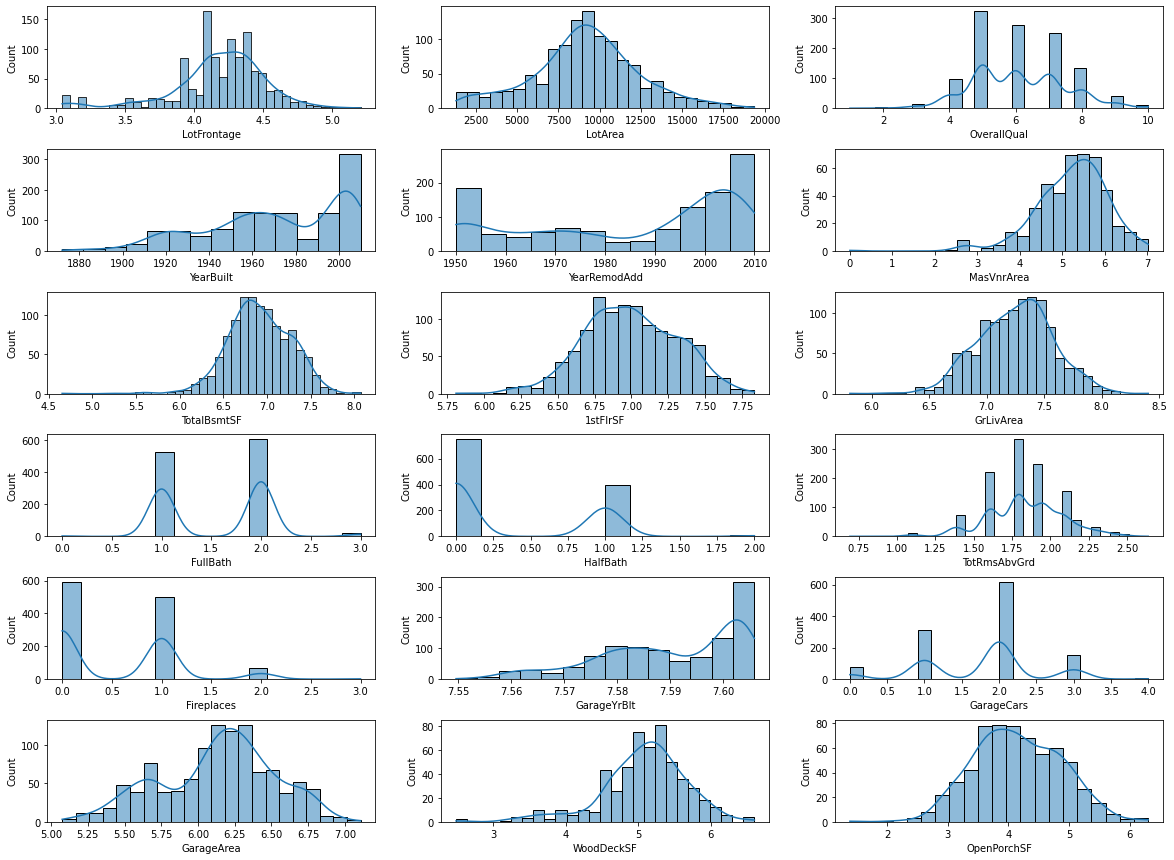

In [43]:
fig, axes = plt.subplots(6, 3, figsize = (20, 15))
fig.subplots_adjust(hspace=0.4)
for idx, high_corr_var in enumerate(high_corr_num_vars):
    vals = [row[high_corr_var] 
        for row in datasets['trainDF'].select(high_corr_var).collect()]
    sns.histplot(data=vals, ax=axes[idx//3, idx%3], kde=True)
    axes[idx//3, idx%3].set(xlabel=high_corr_var)

Graficamente, verifichiamo che, seppur non perfettamente normale, il carattere delle distribuzioni è sicuramente migliorato. Nell'eventualità in cui ci sarà bisogno di svolgere ulteriori elaborazioni sulle variabili in questione, basterà ricordare di riportarsi ai valori originali (tramite un'esponenziale) prima di eseguire le varie operazioni, per poi nuovamente tornare ai logaritmi.

### 2.6 Feature selection (categorica)
Come già visto, gli attributi categorici non presentano valori nulli. Ciò comunque non significa che tutte le colonne di questo tipo siano significative nei termini della predizione su **SalePrice**, infatti, studando il dataset, è possibile vedere che, in più di una istanza, esistono colonne qualitative che presentano in grande maggioranza lo stesso valore, come ad esempio accade per `NA`:

In [44]:
# come prima, conto i valori NA di ogni colonna ed estraggo i campi in cui c'è un conteggio > 0
def count_na(df):
    has_null = []
    for column in df.columns:
        null_count = df.where(col(column) == 'NA').count()
        if null_count > 0:
            has_null.append((column, null_count))
    return has_null

naCountDS = {}
for name, df in datasets.items():
    naCountDS[name] = spark.createDataFrame(count_na(df), 'columnWithNAs STRING, NACount INT')
    naCountDS[name] = naCountDS[name].withColumn('percentage', col('NACount')/df.count())

    print(f'Valori NA di {name}')
    naCountDS[name].show()

Valori NA di trainDF
+-------------+-------+--------------------+
|columnWithNAs|NACount|          percentage|
+-------------+-------+--------------------+
|        Alley|   1075|  0.9275237273511648|
|     BsmtQual|     30|0.025884383088869714|
|     BsmtCond|     30|0.025884383088869714|
| BsmtExposure|     31|0.026747195858498704|
| BsmtFinType1|     30|0.025884383088869714|
| BsmtFinType2|     31|0.026747195858498704|
|   Electrical|      1|8.628127696289905E-4|
|  FireplaceQu|    591|  0.5099223468507333|
|   GarageType|     74|  0.0638481449525453|
| GarageFinish|     74|  0.0638481449525453|
|   GarageQual|     74|  0.0638481449525453|
|   GarageCond|     74|  0.0638481449525453|
|       PoolQC|   1155|   0.996548748921484|
|        Fence|    935|  0.8067299396031061|
|  MiscFeature|   1121|  0.9672131147540983|
+-------------+-------+--------------------+

Valori NA di testDF
+-------------+-------+--------------------+
|columnWithNAs|NACount|          percentage|
+------------

Possiamo anche visualizzare la distribuzione dei `NA` su dei barplot:

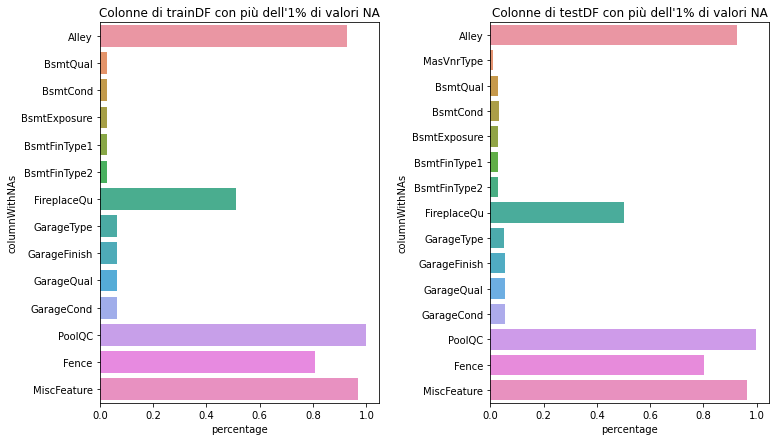

In [45]:
fig, axes = plt.subplots(ncols=2, figsize = (12, 7))
fig.subplots_adjust(wspace=0.4)

# uso toPandas() dato che sto visualizzando un DF risultato di una aggregazione e non sul DF di partenza intero
for idx, ds in enumerate(naCountDS.items()):
    sns.barplot(x='percentage', y='columnWithNAs',
     data=ds[1].select('columnWithNAs', 'percentage').where(col('percentage') > 0.01).toPandas(),
     ax=axes[idx])
    axes[idx].set_title(f'Colonne di {ds[0]} con più dell\'1% di valori NA')
    
plt.show()

Verrà quindi adottata la stessa strategia che per i valori nulli, ovvero dropperemo le colonne che hanno più del 50% di valori `NA`, dato che la loro scarsa 'varianza' si presta utile allo svolgimento del nostro task di regressione.

In [46]:
# drop delle colonne che hanno più del 50% di valori nulli
for name in datasets.keys():
    columns_to_be_dropped = [row['columnWithNAs'] 
        for row in naCountDS[name].select('columnWithNAs').where(col('percentage') > 0.5).collect()]
    print(f'Colonne a maggioranza di NA da droppare in {name}: {columns_to_be_dropped}')
    datasets[name] = datasets[name].drop(*(columns_to_be_dropped))
    naCountDS[name] = naCountDS[name].drop(*(columns_to_be_dropped))

    # rimuovo anche i nomi delle colonne dalla lista delle varaibili categoriche
    cat_vars_est = [var for var in cat_vars_est if var not in columns_to_be_dropped]

Colonne a maggioranza di NA da droppare in trainDF: ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
Colonne a maggioranza di NA da droppare in testDF: ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


Similarmente, dalla documentazione fornita da Kaggle, è possibile vedere che le colonne **Street** e **Utilities** contengono in grande maggioranza lo stesso valore (`Pave` e `AllPub`, rispettivamente), e quindi, dato che non contribuiscono a fornire informazioni utili alla discriminazione della variabile target, possono essere anch'esse droppate.

In [47]:
unnecessary_cols = ['Street', 'Utilities']
for name in datasets.keys():
    print(f'Ulteriori colonne da droppare in {name}: {unnecessary_cols}')
    datasets[name] = datasets[name].drop(*(unnecessary_cols))
    naCountDS[name] = naCountDS[name].drop(*(unnecessary_cols))

    # rimuovo anche i nomi delle colonne dalla lista delle varaibili categoriche
    cat_vars_est = [var for var in cat_vars_est if var not in unnecessary_cols]

Ulteriori colonne da droppare in trainDF: ['Street', 'Utilities']
Ulteriori colonne da droppare in testDF: ['Street', 'Utilities']


### 2.7 Feature engineering

#### 2.7.1 **TotLivSF** e **TotBathsArea**
Seppur molto dettagliato, il dataset fornito non presenta esplicitamente informazioni su alcune caratteristiche che hanno una diretta influenza sul prezzo di una abitazione. In particolare, come descritto nel punto **3.** dell'__[articolo](https://www.opendoor.com/w/blog/factors-that-influence-home-value)__ di J. Gomez (2019), un parametro chiave per la determinazione del valore di una casa è quello legato allo square footage complessivamente abitabile, dal cui conteggio sono esclusi garage, attici e seminterrati incompleti. Di conseguenza, tornerà utile, ai fini dell'addestramento del regressore, aggiungere al dataset un campo **TotLivSF** che contenga il totale delle aree delle zone vivibili dell'abitazione. Sempre sulla scia delle considerazioni di J. Gomez, aggiungeremo un'altra colonna **TotBathsArea** per quantificare la totale superficie coperta dai bagni, un altro fattore determinante del prezzo.

In [48]:
for name in datasets.keys():

    # per TotLivSF, prendo quelle che compongono il totale di interesse,
    # le riporto al valore iniziale con l'esponenziale, sommo e rieffettuo la Log-transform per far in modo 
    # da disporre già della colonna con skewness minimizzata; 
    datasets[name] = datasets[name].withColumn('TotLivSF', expr('log(exp(GrLivArea) + exp(TotalBsmtSF))'))

    # nel caso di TotBathsArea, i valori che la compongono non erano stati trasformati
    datasets[name] = datasets[name].withColumn('TotBathsArea', expr('FullBath + HalfBath*0.5'))

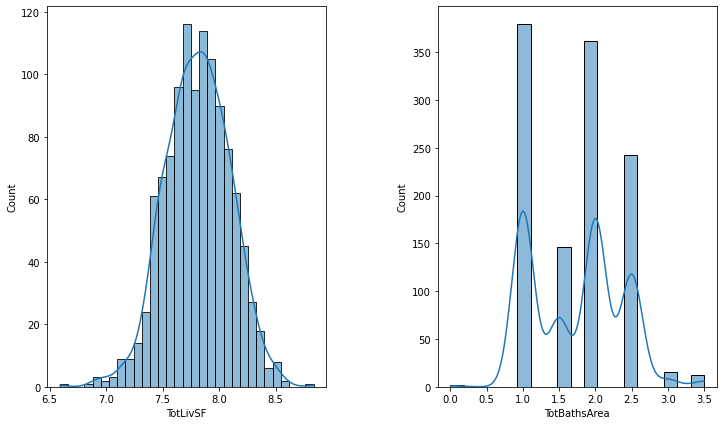

In [49]:
new_cols = ['TotLivSF', 'TotBathsArea']

fig, axes = plt.subplots(ncols=2, figsize = (12, 7))
fig.subplots_adjust(wspace=0.4)

for idx, var in enumerate(new_cols):
    vals = [row[var] 
        for row in datasets['trainDF'].select(var).collect()]
    sns.histplot(data=vals, ax=axes[idx], kde=True)
    axes[idx].set(xlabel=var)

plt.show()

Una volta introdotte le due nuove feature nel DF, non resta che aggiornare la lista dei nomi delle variabili (numeriche).

In [50]:
high_corr_num_vars = high_corr_num_vars + ['TotLivSF', 'TotBathsArea']

#### 2.7.2 Variabili ordinali

Tornando alla suddivisione tra feature numeriche e categoriche, analizzando in dettaglio i singoli elementi in `cat_vars_est`, si può dedurre che alcune variabili qualitative __[possono essere interpretate come ordinali categoriche](https://stats.oarc.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/)__ nel caso in cui le categorie in questione abbiano un qualche tipo di ordinamento ben definito. Le feature in questione sono **ExterQual**, **ExterCond**, **BsmtQual**, **BsmtCond**, **HeatingQC**, **KitchenQual**, **GarageQual** e **GarageCond** (appartengono a questa tipologia anche **FireplaceQu** e **PoolQC**, ma le abbiamo eliminate nello stage di feature selection categorico). Tutte queste variabili sono riferite ad una classificazione della qualità di una caratteristica dell'abitazione, e assumono gli stessi valori indipendentemente dalla caratteristica:
```
ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
```

Le variabili in questione, per la loro natura di 'ranking' (ordinato) di una caratteristica sono più utili se interpretate numericamente tramite un mapping il cui ordinamento ne mantenga il contenuto informativo.

In [51]:
cat_to_ord_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                        'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']

# definisco un dict con le associazioni del mapping categoria -> rank
cat_to_ord_dict = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

# istanzio il mapping sul dict definito
mapping = create_map([lit(x) for x in chain(*cat_to_ord_dict.items())])

# applico il mapping alle colonne interessate
for name in datasets.keys():
    for var in cat_to_ord_vars:
        datasets[name] = datasets[name].withColumn(var, mapping[datasets[name][var]].cast('int'))

#### 2.7.3 **Neighborhood**
L'intuizione ci suggerisce che anche la locazione dell'abitazione in termini di vicinato (**Neighborhood**) gioca un ruolo non indifferente per la valutazione del prezzo. Un `boxplot` di `seaborn` è lo strumento adatto per verificare questa ipotesi.

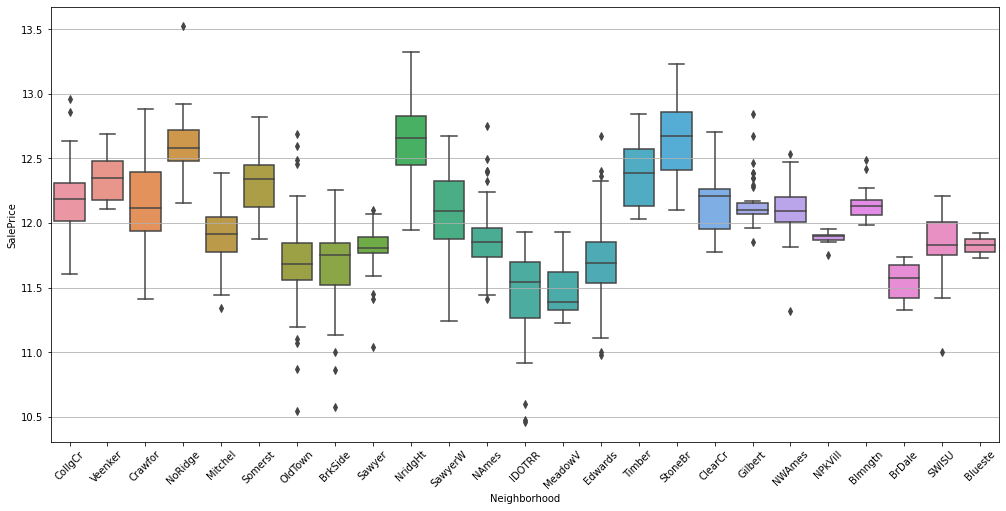

In [52]:
plt.figure(figsize=(17,8))
plt.xticks(rotation=45)
plt.grid()
sns.boxplot(x='Neighborhood', y='SalePrice', data=datasets['trainDF'].select('Neighborhood', 'SalePrice').toPandas());

Il `boxplot` mostra che effettivamente alcuni valori di **Neighborhood** sono associati a prezzi più alti. In particolare, una categorizzazione (ordinale) della colonna è quella che suddivide i vicinati in tre gruppi, ognuno con un intero ordinato in relazione alla qualità (intesa in termini di prezzi medi delle abitazioni in un determinato vicinato). In maniera simile alla sezione 2.7.1, verrà definito un mapping tra i singoli vicinati e il ranking della sua qualità per ricondursi ad un formato numerico.

In [53]:
neigh_map_dict = {'NoRidge': 2, 'NridgHt': 2, 'StoneBr': 2,
                  'CollgCr': 1, 'Veenker': 1, 'Crawfor': 1, 'Mitchel': 1, 'Somerst': 1, 'OldTown': 1,
                  'BrkSide': 1, 'Sawyer': 1, 'SawyerW': 1, 'NAmes': 1, 'Edwards': 1, 'Timber': 1,
                  'ClearCr': 1, 'Gilbert': 1, 'NWAmes': 1,'NPkVill': 1, 'Blmngtn': 1, 'SWISU': 1, 'Blueste': 1,
                  'IDOTRR': 0, 'MeadowV': 0, 'BrDale': 0}

In [54]:
# istanzio il nuovo mapping 
neigh_mapping = create_map([lit(x) for x in chain(*neigh_map_dict.items())])

# applico il neigh_mapping a Neighborhood
for name in datasets.keys():
    datasets[name] = datasets[name].withColumn('Neighborhood', neigh_mapping[datasets[name]['Neighborhood']].cast('int'))

In [55]:
# avendo concluso operazioni e selezioni sulle feature, visualizzo la struttura finale
cat_vars_est = [item[0] for item in datasets['trainDF'].dtypes if item[1].startswith('string')]
num_vars_est = [var for var in datasets['trainDF'].columns if var not in cat_vars_est and var != 'Id']

print(f"Stima finale del numero delle variabili categoriche di trainDF: {len(cat_vars_est)}\n {cat_vars_est}")
print(f"\nStima finale del numero di variabili numeriche di trainDF: {len(num_vars_est)}\n {num_vars_est}")

Stima finale del numero delle variabili categoriche di trainDF: 28
 ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']

Stima finale del numero di variabili numeriche di trainDF: 30
 ['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'TotLivSF', 'TotBathsArea']


Avendo completato lo stage di data analysis, memorizzo il risultato ottenuto su HDFS.

In [ ]:
# datasets['trainDF'].write.save('hdfs://localhost:9000/bigdata/houseprices/cleaned_datasets/cleaned_train.csv')
# datasets['testDF'].write.save('hdfs://localhost:9000/bigdata/houseprices/cleaned_datasets/cleaned_test.csv')

# 3. Regressione
Lo stage di analisi del dataset ha portato alla pulizia, correzione e selezione dei dati rilevanti al task da svolgere. Rimane solo da preparare le feature in questione per poterle dare in pasto all'addestramento del modello regressore e alla predizione sul testset finale.

### 3.1 Codifica delle feature

Tutte le feature avranno bisogno di essere vettorizzate in un `Vector` tramite la classe `VectoAssembler` di `pyspark.ml.feature`. Se da un lato le variabili numeriche sono già pronte a questa procedura, bisogna opportunamente codificare quelle categoriche in maniera che vengano indicizzate al fine di poter essere interpretate numericamente dal modello. Questa operazione verrà eseguita, per ogni variabile, con un apposito `StringIndexer`.

In [56]:
# centralizzo tutte le variabili su cui verrà effettuato l'addestramento
training_features = high_corr_num_vars + cat_vars_est

In [57]:
# istanzio gli StringIndexer per ogni variabile categorica
indexers_list = [StringIndexer(inputCol=column, outputCol=column+'_idx', handleInvalid='keep').fit(datasets['trainDF']) 
                    for column in cat_vars_est]

In [58]:
# eseguo una Pipeline di preprocessing per indicizzare i dati
for name in datasets.keys():
    prepr_pipeline = Pipeline(stages=indexers_list)
    datasets[name] = prepr_pipeline.fit(datasets[name]).transform(datasets[name])

In [59]:
# estraggo i dati numerici e categorici indicizzati
input_cols = [feat + '_idx' if feat in cat_vars_est else feat for feat in training_features if feat != 'SalePrice']

datasets['trainDF'] = datasets['trainDF'].select(*input_cols, 'SalePrice')
datasets['testDF'] = datasets['testDF'].select('Id', *input_cols)

In [60]:
assembler = VectorAssembler(inputCols=datasets['trainDF'].drop('SalePrice').columns, outputCol='features', handleInvalid='keep')
train_vector = assembler.transform(datasets['trainDF'])

assembler2 = VectorAssembler(inputCols=datasets['testDF'].drop('Id').columns, outputCol='features', handleInvalid='keep')
test_vector = assembler2.transform(datasets['testDF'])

### 3.2 Addestramento e valutazione
Il modulo `pyspark.ml.regression` mette a disposizione diversi algoritmi di apprendimento per il task di regressione. La scelta del modello migliore per il nostro di task di predizione è stata effettuata tra `LinearRegression`, `GeneralizedLinearRegression`, `DecisionTreeRegressor` e `RandomForestRegressor`. Di questi, a monte di diverse prove su diversi tuning di iperparametri, il `RandomForestRegressor` si è dimostrato quello che permette di ricavare il risultato migliore.

In [61]:
randomForest = RandomForestRegressor(featuresCol='features', labelCol='SalePrice', maxBins=100)

Al fine di automatizzare il tuning degli iperparamteri del modello, `pyspark` fornisce anche la classe `ParamGridBuilder`, che effettua un addestramento esaustivo sullo spazio degli iperparametri esplcitati, in questo caso `numTrees` e `maxDepth`. Il `ParamGridBuilder` valuterà la performance dell'algoritmo sulla base della metrica della cross-validation.

La __[documentazione](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/evaluation)__ della competizione Kaggle riporta che la metrica utilizzata per la valutazione del risultato è la **Root-Mean-Squared-Error (RMSE)** tra i logaritmi del valore predetto e il logaritmo dell'effettivo prezzo dell'abitazione. Poichè abbiamo già effettuato la Log-transform dei dati, basterà semplicemente specificare l'RMSE come metrica del `RegressionEvaluator` passato alla cross-validation.

In [62]:
paramGrid = ParamGridBuilder() \
    .addGrid(randomForest.numTrees, [100, 110, 120, 130]) \
    .addGrid(randomForest.maxDepth, [4, 6, 8]) \
    .build()

Idealmente, eseguiremmo una k-fold cross-validation **stratificata**, al fine di __[limitare i problemi dovuti al random sampling](https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e)__; tuttavia, `pyspark` non dispone di una tecnologia che la implementi direttamente, per cui ci limiteremo alla tradizionale cross-validation, sull'ipotesi che gli stage di unskewing effettuati precedentemente limitino l'effetto del random sampling.

In [63]:
# istanzio la 10-fold cross-validation con l'algoritmo di addestramento, il ParamGridBuilder e l'evaluator della regressione 
#basato su metrica RMSE
crossval = CrossValidator(estimator=randomForest,
                          estimatorParamMaps=paramGrid,
                          evaluator=RegressionEvaluator(metricName='rmse', labelCol='SalePrice'),
                          numFolds=10)

In [64]:
# eseguo l'addestramento
cvModel = crossval.fit(train_vector)

In [65]:
# utilizzo il modello addestrato per la previsione
predictions = cvModel.transform(test_vector)

Effettuata la predizione, ne estraggo i valori e creo il `csv` nel formato richiesto da Kaggle per la submission finale. Inoltre, prima di estrarre la submission definitiva, sarà necessario riportare i valori predetti di **SalePrice** dai logaritmi a quelli 'reali' tramite l'esponenziazione con `exp`.

In [66]:
# il csv di submission dovrà avere due colonne, 'Id' e 'SalePrice'
submission = predictions.withColumn('prediction', exp(col('prediction'))).select('Id', col('prediction').alias('SalePrice'))

In [67]:
# submission.write.save('hdfs://localhost:9000/bigdata/houseprices/submissions/submission_t3.csv')
submission.write.format('csv').save('./predictions/submission_t5.csv')

La sottomissione su Kaggle delle predizioni effettuate ritorna un RMSE logaritmico sul risultato finale di 0.15295, migliore rispetto al precededente 0.16273.

![banner](./imgs/submission_best.png)